> # **BAGGING ENSEMBLE**
> Bagging, short for `Bootstrap Aggregating`, is an ensemble learning technique that combines multiple models to improve accuracy, stability, and `reduce variance`. It’s particularly useful for unstable models like decision trees, neural networks, and subset selection in linear regression.<BR><BR>
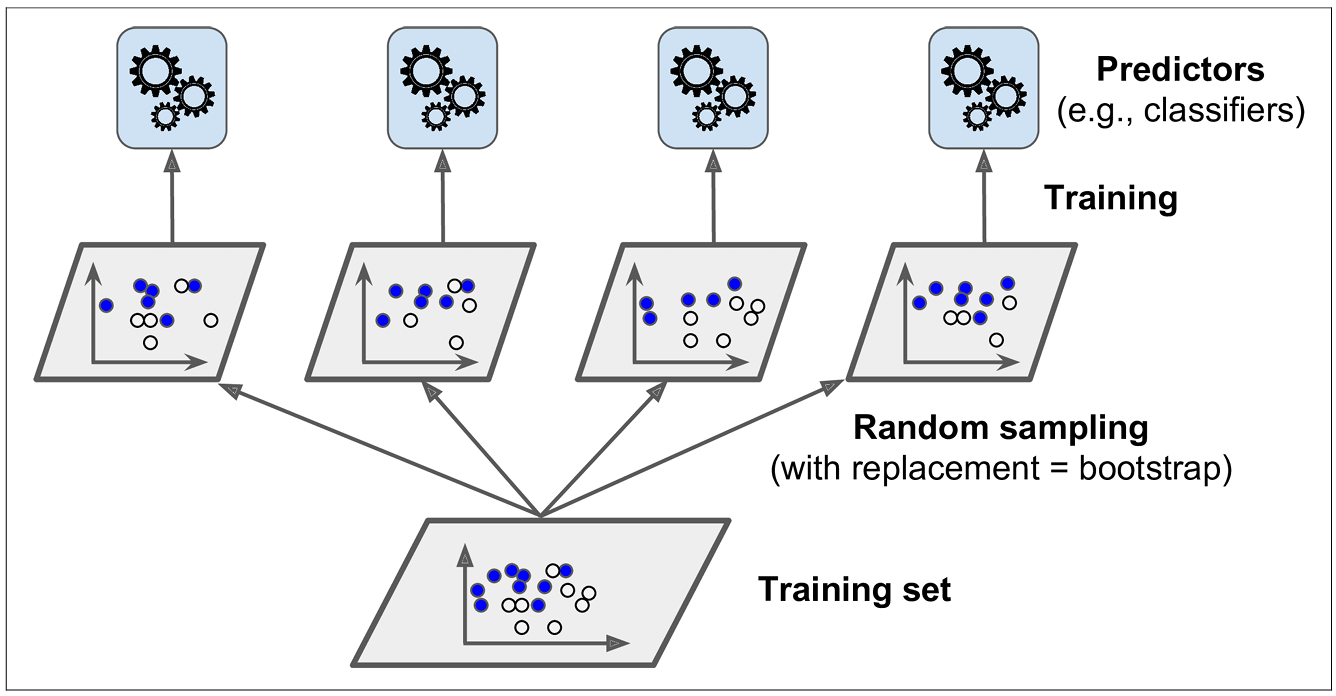

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import BaggingRegressor

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
dataset = load_iris(as_frame = True)
df = dataset.data
df['Species'] = dataset.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

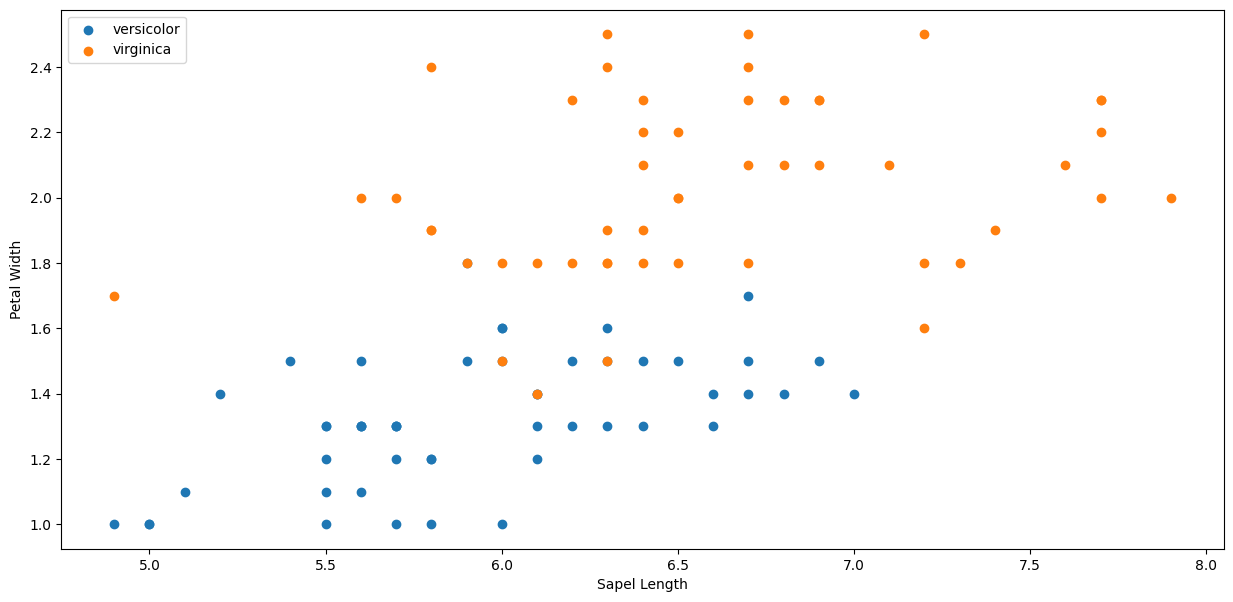

In [14]:
new_df = df[df['Species'] != 0].loc[:, ['sepal length (cm)', 'petal width (cm)', 'Species']]

plt.figure(figsize=(15, 7))
plt.scatter(new_df[new_df['Species'] == 1]['sepal length (cm)'], new_df[new_df['Species'] == 1]['petal width (cm)'], label = "versicolor")
plt.scatter(new_df[new_df['Species'] == 2]['sepal length (cm)'], new_df[new_df['Species'] == 2]['petal width (cm)'], label = 'virginica')

plt.xlabel("Sapel Length")
plt.ylabel("Petal Width")
plt.legend(loc = 'upper left')

plt.show()

In [15]:
new_df = new_df.sample(100)

df_train = new_df.iloc[:60,:]
df_validation = new_df.iloc[60:80,:]
df_test = new_df.iloc[80:,:]

<hr>

> ### BAGGING ENSEMBLE TYPES
> 1. `Bagging` : Row Samples with replacement<br><br>
> 2. `Pasting` : Row Samples without replacement<br><br>
> 3. `Random Subspaces` : Column Samples without Row Sampling<br><br>
> 4. `Random Patches` : Both Row and Column Samples

In [16]:
X, y = make_classification(
    n_samples=10000,
    n_features=10,
    n_informative=3,
    n_classes=3,
    n_clusters_per_class=2,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Using 1 Desicion Tree

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print("Decision Tree accuracy",accuracy_score(y_test,y_pred))

Decision Tree accuracy 0.896


<hr>

> ### Type 1: `bootstrap=True` - Bagging

In [18]:
bg = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50, 
    bootstrap=True, # Means - Row Sampling is activated
    random_state=42,
    n_jobs=-1,
)

bg.fit(X_train, y_train)
y_pred = bg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1_score:", f1_score(y_test, y_pred, average="weighted"))

Accuracy: 0.928
F1_score: 0.9278831014805877


> ### Type 2: `bootstrap=False` - Pasting

In [19]:
bg = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50, 
    bootstrap=False,
    random_state=42,
    n_jobs=-1,
)

bg.fit(X_train, y_train)
y_pred = bg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1_score:", f1_score(y_test, y_pred, average="weighted"))

Accuracy: 0.8935
F1_score: 0.8934690081836145


> ### Type 3: `bootstrap_features=True` - Random Subspaces

In [20]:
bg = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50, 
    bootstrap=False,
    bootstrap_features=True,
    random_state=42,
    n_jobs=-1,
)

bg.fit(X_train, y_train)
y_pred = bg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1_score:", f1_score(y_test, y_pred, average="weighted"))

Accuracy: 0.9225
F1_score: 0.9223748402979507


> ### Type 4: `bootstrap=True, bootstrap_features=True` - Random Patches

In [21]:
bg = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50, 
    bootstrap=True,
    bootstrap_features=True,
    random_state=42,
    n_jobs=-1,
)

bg.fit(X_train, y_train)
y_pred = bg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1_score:", f1_score(y_test, y_pred, average="weighted"))

Accuracy: 0.9185
F1_score: 0.9183057507937087


<hr>

> ### Case 2 : Bagging using `SVM`

In [22]:
bg = BaggingClassifier(
    estimator=SVC(),
    n_estimators=50, 
    max_samples=0.5, 
    bootstrap=True,
    random_state=42,
    oob_score=True,
    n_jobs=-1,
)

bg.fit(X_train, y_train)

BaggingClassifier(estimator=SVC(), max_samples=0.5, n_estimators=50, n_jobs=-1,
                  oob_score=True, random_state=42)

In [23]:
y_pred = bg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1_score:", f1_score(y_test, y_pred, average=None))

Accuracy: 0.8775
F1_score: [0.91141035 0.86117647 0.85692542]


<hr>

> ### OUT OF BAG EVALUATION
> - The `Out-of-Bag (OOB) score` is a performance metric for Random Forest models, specifically ensemble models, which provides an unbiased estimate of the model’s performance on unseen data. It is calculated using the samples that are not used in the training of the model, also known as out-of-bag (OOB) samples.<BR><br>
> - It is statically proven that `37% data is not visited while doing sampling multiple times`<BR><br>
> - so oob_score is the accuracy of model's prediction on that unseen data 

In [24]:
bg.oob_score_

0.875125

In [25]:
bg.estimators_samples_[0:5] # Rows used for sampling

[array([2523, 3113, 7114, ..., 5668, 7066, 3677]),
 array([4782,  663, 7155, ..., 3122, 2141, 5379]),
 array([5462, 6574, 4896, ..., 6686, 4871, 6424]),
 array([2848, 2629, 1591, ...,  595, 4333, 1671]),
 array([3821, 6494, 1606, ..., 1645, 3358,  388])]

In [26]:
bg.estimators_features_[0:5] # Columns used for sampling

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])]

<hr>

> ### HYPERPARAMETER TUNING

In [ ]:
parameters = {
    'n_estimators': [5, 10, 50], 
    'max_samples': [0.1,0.4,0.7,1.0],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.4,0.7,1.0],
    'bootstrap_features' : [True, False],
}

search =  GridSearchCV(BaggingClassifier(), param_grid=parameters, cv = 5)

search.fit(X_train,y_train)

### Best Parameters

In [ ]:
search.best_params_

{'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 50}

### Cross Validation Score

In [ ]:
search.best_score_

0.8842500000000001

<hr>

> # **BAGGING REGRESSOR**

In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples=100,
    n_features=5,
    n_informative=4,
    n_targets=1,
    noise=100,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [ ]:
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = knn.predict(X_test)

print("R^2 score for LR",r2_score(y_test,y_pred1))
print("R^2 score for DT",r2_score(y_test,y_pred2))
print("R^2 score for KNN",r2_score(y_test,y_pred3))

R^2 score for LR 0.7453000434823884
R^2 score for DT 0.4035457237456819
R^2 score for KNN 0.3699087523095913


In [ ]:
bag_regressor = BaggingRegressor(
    estimator=LinearRegression(),
    n_estimators=500,
    bootstrap=True,
    bootstrap_features = False,
    random_state=42,
    oob_score=True
)

bag_regressor.fit(X_train, y_train)

BaggingRegressor(estimator=LinearRegression(), n_estimators=500, oob_score=True,
                 random_state=42)

In [ ]:
y_pred = bag_regressor.predict(X_test)
r2_score(y_test, y_pred)

0.7469464296790529